In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
#importing modules

In [2]:
df=pd.read_csv('kyphosis.csv')
#reading data

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


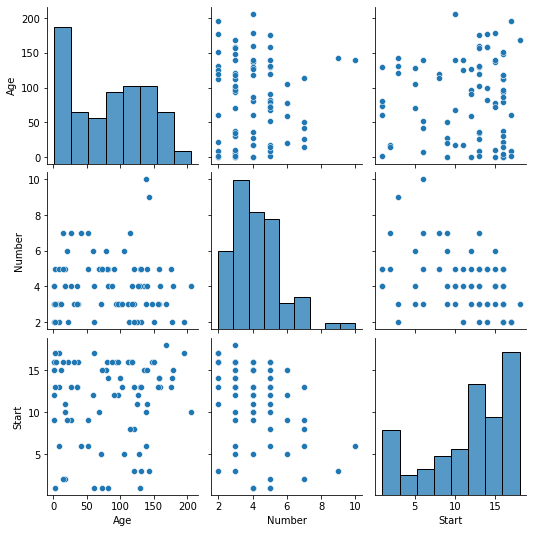

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split
#splitting

In [7]:
X=df.drop('Kyphosis',axis=1)

In [9]:
y=df['Kyphosis']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree=DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)
#fitting

DecisionTreeClassifier()

In [15]:
predictions=dtree.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
print(confusion_matrix(predictions,y_test),classification_report(predictions,y_test))
#72% accuracy 

[[17  5]
 [ 2  1]]               precision    recall  f1-score   support

      absent       0.89      0.77      0.83        22
     present       0.17      0.33      0.22         3

    accuracy                           0.72        25
   macro avg       0.53      0.55      0.53        25
weighted avg       0.81      0.72      0.76        25



In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc=RandomForestClassifier(n_estimators=200)

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [21]:
rfc_pred=rfc.predict(X_test)

In [22]:
print(confusion_matrix(rfc_pred,y_test),classification_report(rfc_pred,y_test))

[[19  5]
 [ 0  1]]               precision    recall  f1-score   support

      absent       1.00      0.79      0.88        24
     present       0.17      1.00      0.29         1

    accuracy                           0.80        25
   macro avg       0.58      0.90      0.58        25
weighted avg       0.97      0.80      0.86        25



In [23]:
error_rate=[]
for i in range(1,40):
    rfc=RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    rfc_pred_i=rfc.predict(X_test)
    error_rate.append(np.mean(rfc_pred_i!=y_test))

Text(0, 0.5, 'error rate')

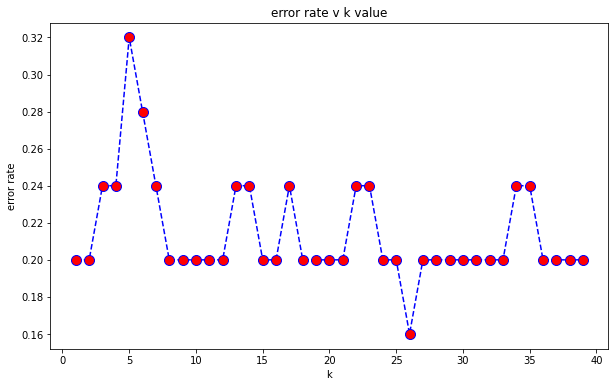

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error rate v k value')
plt.xlabel('k')
plt.ylabel('error rate')

In [25]:
rfc=RandomForestClassifier(n_estimators=26)
rfc.fit(X_train,y_train)
rfc_pred_i=rfc.predict(X_test)

In [26]:
print(confusion_matrix(rfc_pred_i,y_test),classification_report(rfc_pred_i,y_test))
#80 % accuracy

[[19  5]
 [ 0  1]]               precision    recall  f1-score   support

      absent       1.00      0.79      0.88        24
     present       0.17      1.00      0.29         1

    accuracy                           0.80        25
   macro avg       0.58      0.90      0.58        25
weighted avg       0.97      0.80      0.86        25

